# House Prices - Advanced Regression Techniques


<img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png">

### Preços de casas - Técnicas Avançadas de Regressão

- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando e visualizando base

In [2]:
treino = pd.read_csv('train.csv')
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
teste = pd.read_csv('test.csv')
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


### Visualizando informações da base

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analisando valores vazios

In [5]:
treino.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

### Visualizando a porcentagem de valores vazios em cada coluna

In [6]:
((treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False)* 100) .head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

### Apos uma analise, percebemos que nas 4 primeiras colunas, NA é sim é uma informação
- Podemos substituir os valores vazios por -1

In [7]:
treino[['PoolQC','MiscFeature','Alley','Fence']] = treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

### Vamos eliminar as colunas com mais de 10% de valores vazios

In [8]:
eliminar = treino.columns[treino.isnull().sum()/treino.shape[0] > 0.1]
eliminar

Index(['LotFrontage', 'MasVnrType', 'FireplaceQu'], dtype='object')

### Temos que fazer o mesmo tratamento para o teste
- Se não, da erro por dados diferentes.

In [9]:
treino = treino.drop(eliminar,axis=1)
teste = teste.drop(eliminar,axis=1)

### Substituindo valores vazios restantes

In [10]:
treino.isnull().sum().sort_values(ascending=False).head(3)

GarageFinish    81
GarageYrBlt     81
GarageQual      81
dtype: int64

In [11]:
treino = treino.fillna(-1)

#### Verificando novamente

In [12]:
treino.isnull().sum().sort_values(ascending=False).head(3)

Id              0
BedroomAbvGr    0
GarageYrBlt     0
dtype: int64

# Analise exploratoria dos dados

### Verificando a cardinalidade dos dados


In [13]:
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

- Por mais que o Id tenha uma alta cardinalidade, não irei eliminar esse valor pois vamos usar esse dado para fazer a submissão do nosso código. Alem disso, valores numericos naturalmente tem alta cardinalidade.

### Analisando a variavel target (SalePrice)

In [14]:
# Descrição estatística
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Visualizando distribuição com Boxplot

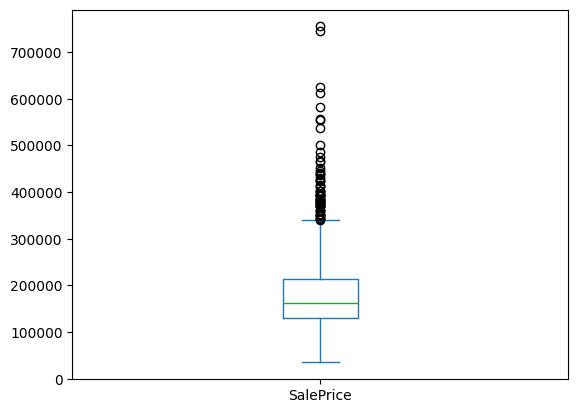

In [15]:
treino.SalePrice.plot.box();

## Verificando a correlação entre os valores

In [16]:
# Pegando so colunas numericas
treino_sn = treino.select_dtypes(include=['number'])

In [17]:
treino_sn.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472585
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Visualizando graficamente a correlação

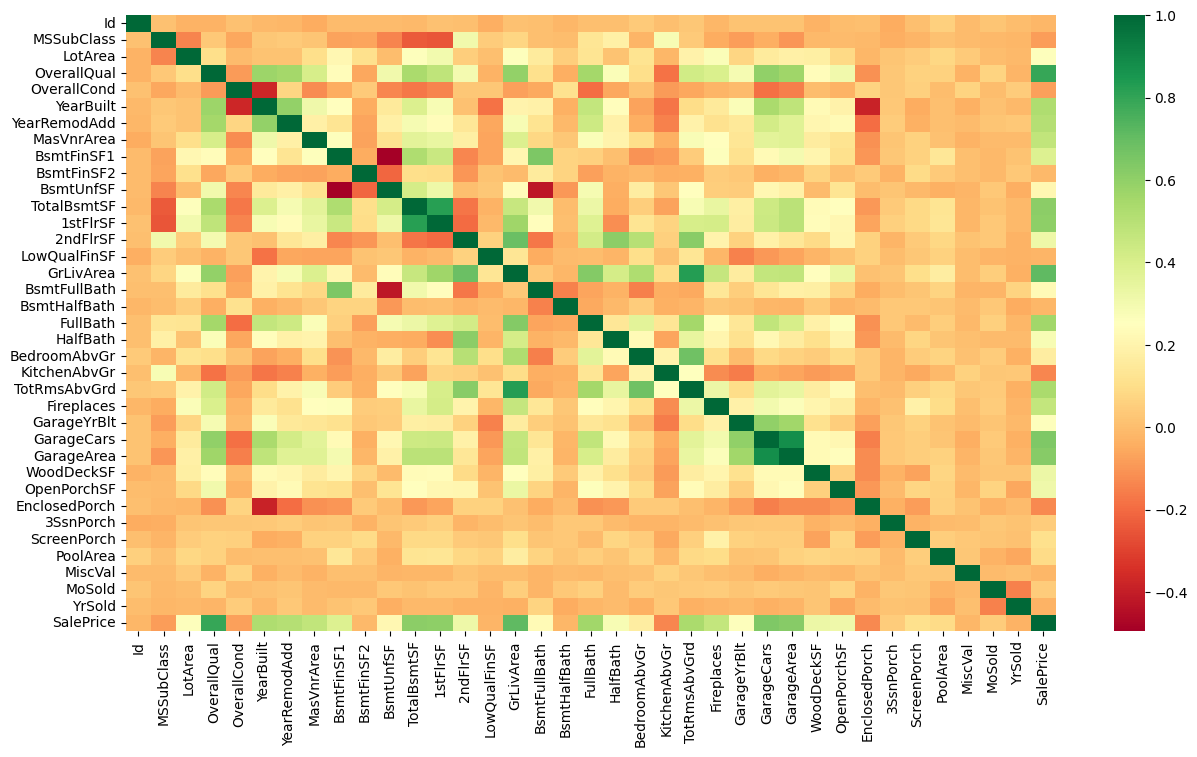

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(treino_sn.corr(),cmap='RdYlGn')

plt.show()

## Visualizando relação entre o target e algumas variaveis
- OverallQual: Alta Correlação positiva (Tentem a aumentar juntas)
- BsmtHalfBath: Sem correlação
- KitchenAbvGr: Alta Correlação negativa  ( Uma variavel tende a aumentar quando a outra diminui)

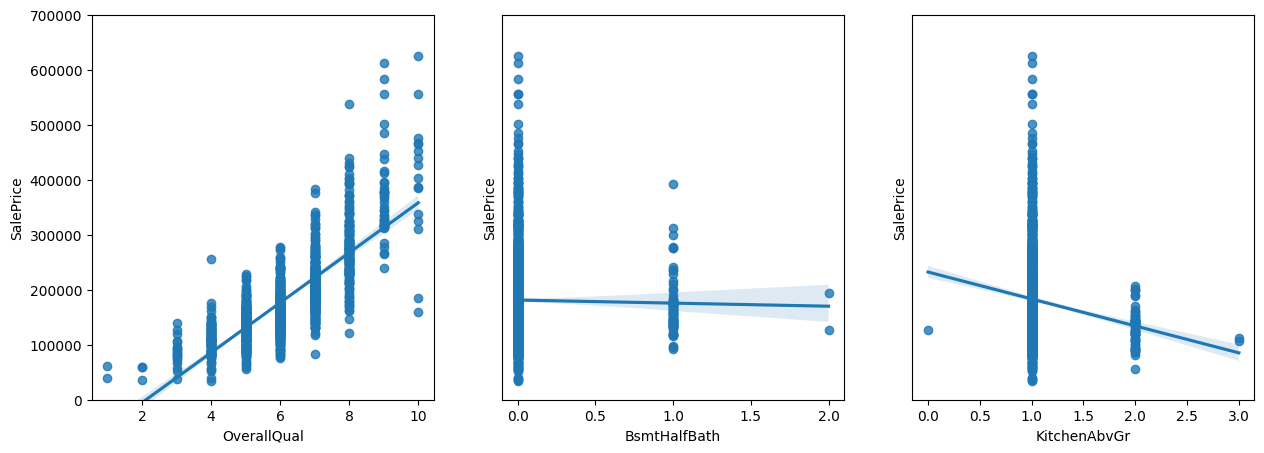

In [19]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(data=treino,x='OverallQual',y='SalePrice',ax=ax[0])
sns.regplot(data=treino,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=treino,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

# Trabalhando com os dados textuais

In [20]:
# Selecionando as colunas
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### Visualizando as casas mais caras

In [21]:
caras = treino.sort_values('SalePrice').tail(10)
caras = caras[obj_cols]  # So colunas de texto
caras.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
769,RL,Pave,-1,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,WD,Normal


### Visualizando as casas mais baratas

In [22]:
baratas = treino.sort_values('SalePrice').head(10)
baratas = baratas[obj_cols] 
baratas.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml
968,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,-1,-1,-1,-1,Y,-1,GdWo,-1,WD,Abnorml


### Analisando caracteristicas das casas caras e baratas
- Retorna a quantidade de valores únicos de cada coluna. Ou seja, se na caterigoria do ar condicionado so tem um tipo para as casas caras (Yes), pode ser que esse valor da coluna esteja relacionado ao preço da casa.

In [23]:
caras_val = caras.nunique()
caras_val.head(10)

MSZoning        1
Street          1
Alley           1
LotShape        3
LandContour     2
Utilities       1
LotConfig       3
LandSlope       2
Neighborhood    3
Condition1      1
dtype: int64

### Verificando agora para as casas mais baratas

In [24]:
baratas_val = baratas.nunique()
baratas_val.head(2)

MSZoning    3
Street      2
dtype: int64

### Podemos unir esses valores
- 0 e 1 sao casas caras e baratas

In [25]:
rep = pd.concat([caras_val,baratas_val],axis=1).sort_values([0,1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


### Agora visualizando essas colunas para as casas mais caras

In [26]:
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


### E para as mais baratas

In [27]:
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


#### Podemos assim, entender que dentre as casas mais caras, todas tem CentralAir e PavedDrive

#### Dentre as casas mais baratas, nenhuma tem CentralAir e poucas tem PavedDrive


## Agora podemos investigar melhor essas principais colunas


## Coluna CentralAir
    

In [28]:
# Verificando os valores nessa coluna
treino.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

### Visualizando a relação com o preço

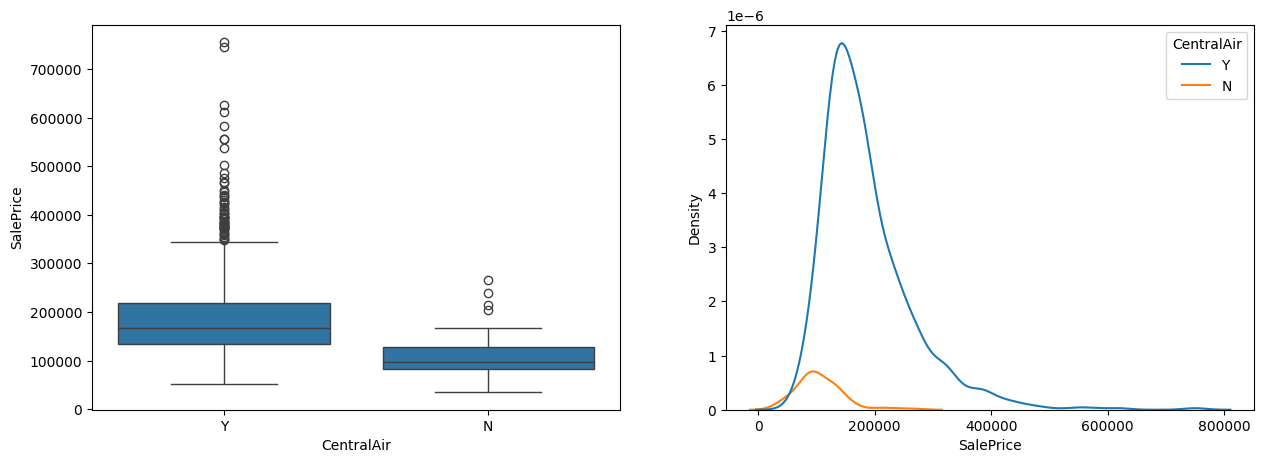

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino.CentralAir,y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino.CentralAir,ax=ax[1])

plt.show()

- O valor "N", apesar de não ser um valor tão frequente, aparecer na maioria das casas de menor valor, é uma coluna relevante

## Coluna PavedDrive

In [30]:
# Verificando os valores nessa coluna
treino.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

### Verificando a relação desses valores com o preço da casa

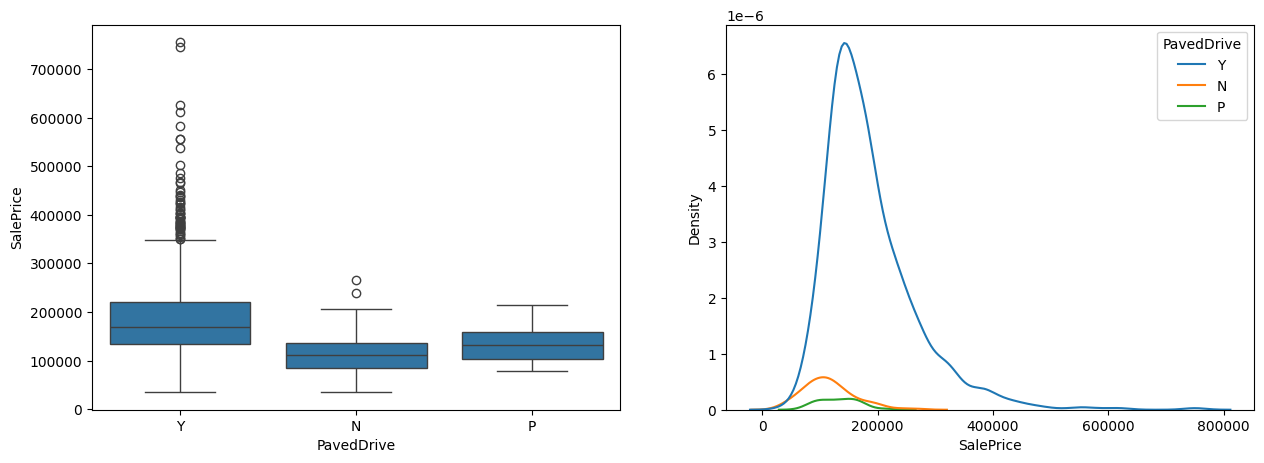

In [31]:

fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino['PavedDrive'],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino['PavedDrive'],ax=ax[1])

plt.show()

- Notamos tambem que **PavedDrive** é uma coluna importante: Quando a rua tende a ser pavimentada, o valor da casa tende a ser mais alto

## Coluna MSZoning

In [32]:
# Entendendo a distribuição
treino["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

### Fazendo um groupby desses dados para ver a média de acordo com as categorias

In [33]:
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

### Visualizando a distribuição desses valores

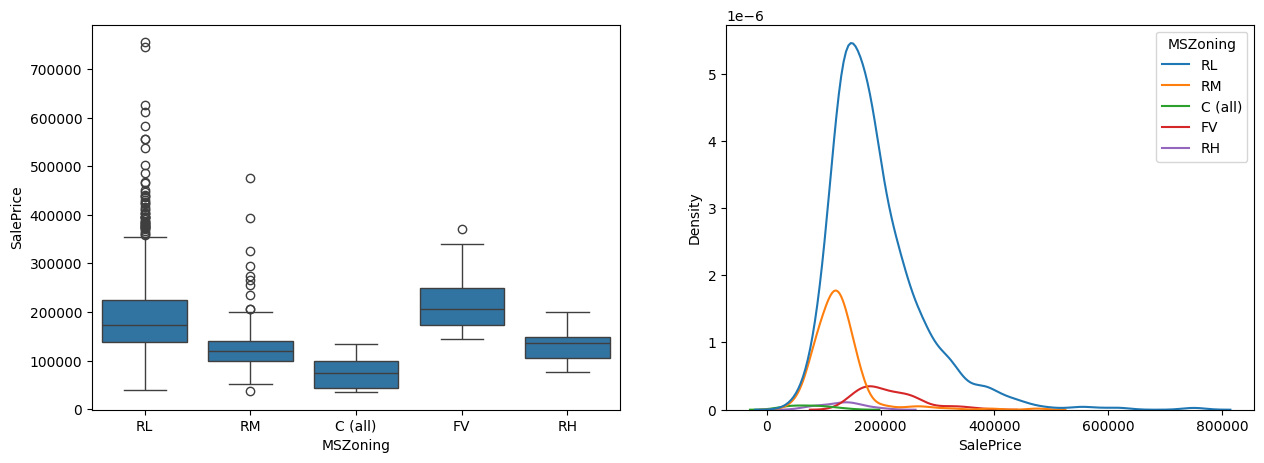

In [34]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino['MSZoning'],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino['MSZoning'],ax=ax[1])

plt.show()

- Notamos uma clara diferença entre os preços de cada categoria. É uma coluna importante

### Transformando essas colunas importantes em colunas numericas com OneHotEncoder

- CentralAir, PavedDrive e MSZoning

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Criando o encoder para essa coluna
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [37]:
# Fazendo o fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(treino[["CentralAir", "PavedDrive", 'MSZoning']])

In [38]:
#Transform
ohe_MSZoning.transform(treino[["CentralAir", "PavedDrive", 'MSZoning']]).toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [39]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[["CentralAir", "PavedDrive", 'MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())

In [40]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_MSZoning_df],axis=1)

In [41]:
# Eliminando as colunas 
treino = treino.drop(["CentralAir", "PavedDrive", 'MSZoning'],axis=1)

In [42]:
# Verificando o resultado
treino.head(10)

,Id,MSSubClass,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,8450,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,9600,Pave,-1,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,11250,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,9550,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,60,14260,Pave,-1,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,50,14115,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,7,20,10084,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,8,60,10382,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,9,50,6120,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,190,7420,Pave,-1,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Realizando os mesmos tratamentos para a base de teste

### Substituindo os valores null por -1

In [43]:
teste[['PoolQC','MiscFeature','Alley','Fence']] = teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [44]:
teste = teste.fillna(-1)

In [45]:
treino.isnull().sum().sort_values(ascending=False).head(3)

Id               0
GarageYrBlt      0
EnclosedPorch    0
dtype: int64

### Transformando as colunas importantes do "teste" com OneHotEncoder

- CentralAir, PavedDrive e MSZoning

In [46]:
ohe_MSZoning.transform(teste[["CentralAir", "PavedDrive", 'MSZoning']]).toarray()

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [47]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[["CentralAir", "PavedDrive", 'MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
# Unindo essa coluna com a base
teste = pd.concat([teste,ohe_MSZoning_df],axis=1)

In [49]:
# Eliminando as colunas 
teste = teste.drop(["CentralAir", "PavedDrive", 'MSZoning'],axis=1)

In [50]:
# Verificando o resultado
teste.head(10)

,Id,MSSubClass,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,11622,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1462,20,14267,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463,60,13830,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464,60,9978,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465,120,5005,Pave,-1,IR1,HLS,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1466,60,10000,Pave,-1,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1467,20,7980,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1468,60,8402,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1469,20,10176,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,1470,20,8400,Pave,-1,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Analisando as informações sobre garagem

In [51]:
# Verificando os valores nessa coluna
treino.GarageQual.value_counts()

GarageQual
TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

### Visualizando graficamente

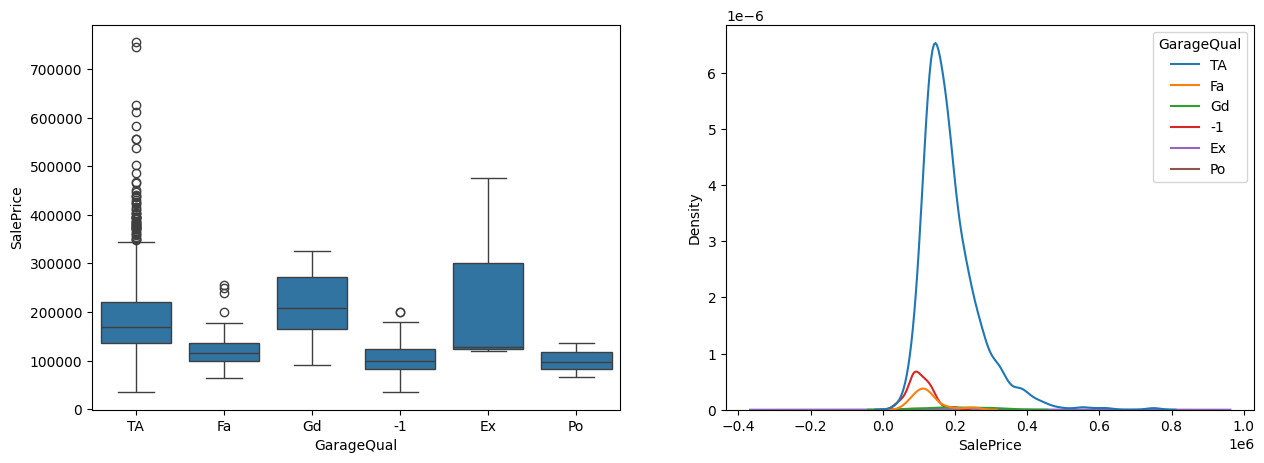

In [52]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino['GarageQual'],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino['GarageQual'],ax=ax[1])

plt.show()

- Percebemos que existem várias colunas de garagem, então podemos visualizar essas informações

### Verificando as colunas que possuem garagem no nome

In [53]:
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [54]:
# Visualizando os valores nessa base
treino[cols_garagem].head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


### Analisando Qualidade e Condição da garagem

#### Fazendo o value_counts das colunas de Qualidade e Condição

In [55]:
treino[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
Name: count, dtype: int64

### Contando em quantas colunas temos GarageQual == GarageCond

In [56]:
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

- **Podemos apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"** 

In [57]:
# Apagando a coluna GarageCond
treino = treino.drop('GarageCond',axis=1)
teste = teste.drop('GarageCond',axis=1)

### Analisando  "GarageCars" e "GarageArea"**

In [58]:
# Analisando a correlação entre as duas colunas e o preço
treino[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


### Eliminando a coluna GarageArea

In [59]:
treino = treino.drop('GarageArea',axis=1)
teste = teste.drop('GarageArea',axis=1)

### Verificando novamente as colunas que possuem garagem no nome

In [60]:
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

## Preparando para o modelo

### Selecionando apenas as colunas numéricas para o modelo

In [61]:
col_nr = treino.columns[treino.dtypes != 'object']
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'CentralAir_N', 'CentralAir_Y',
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM'],
      dtype='object')

### E criar uma nova base com esses valores


In [62]:
treino = treino.loc[:,col_nr]

## Criando nosso modelo

### Selecionando X e y

In [63]:
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

### Treino e teste

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Regressão linear

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg_rl = LinearRegression().fit(X_train, y_train)

#### Previsão

In [68]:
y_pred_rl = reg_rl.predict(X_test)

## RandomForestRegressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

#### Previsão

In [71]:
y_pred_rf = reg_rf.predict(X_test)

## XGBoost

In [72]:
# Instalando o XGBoost
#!pip install xgboost

In [73]:
# Importando o XGBoost
from xgboost import XGBRegressor

In [74]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_xgb = XGBRegressor(random_state=42).fit(X_train, y_train)

#### Previsão

In [75]:
y_pred_xgb = reg_xgb.predict(X_test)

# Avaliando modelos

- Erro absoluto quanto o quadrático

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Avaliando Erro da Regressão

In [77]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23522.31796534937
1529427264.4718125


### Avaliando erro do Random Forest

In [78]:
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

18079.757282157676
985746098.2582753


### Avaliando erro do xgb

In [79]:
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

18938.96437370332
1062438198.8005089


## Visualizando a relação do y_test com as previsões feitas

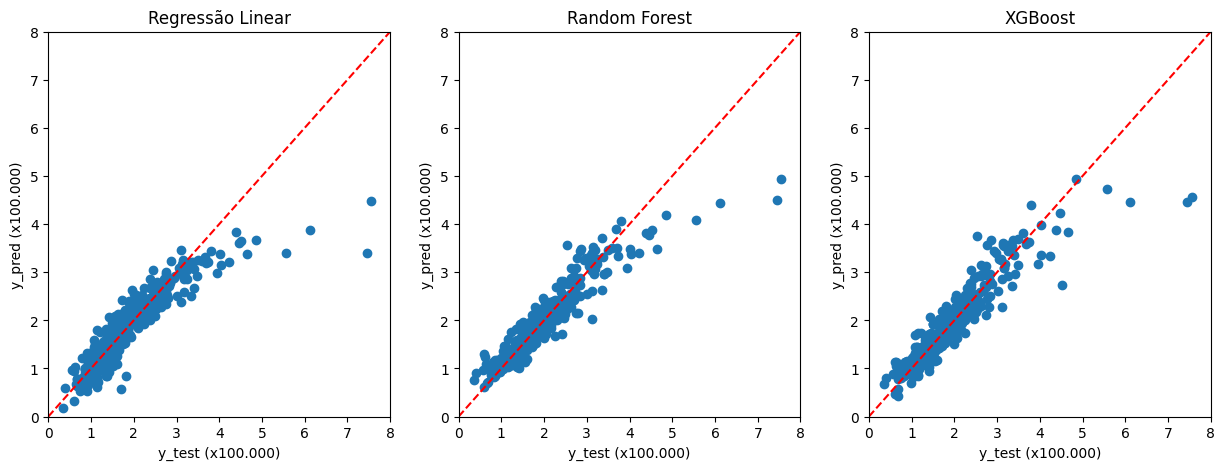

In [80]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_rf/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_xgb/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Random Forest')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('XGBoost')

plt.show()

## Grid_search: Estimando os melhores parâmetros

In [83]:
from sklearn.model_selection import GridSearchCV

#### Para o RandomForestRegressor

In [88]:
reg_rf = RandomForestRegressor(random_state=42)


parametros_rf = {
    'n_estimators': [80, 100, 150],
    'criterion': ['squared_error','poisson'],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt']
}

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
grid_search_rf = GridSearchCV(estimator=reg_rf,param_grid=parametros_rf,scoring='neg_mean_squared_error')
grid_search_rf = grid_search_rf.fit(X_train,y_train)

### Verificando os melhores parâmetros para o RandomForest e o melhor score

In [91]:
grid_search_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 80}

In [93]:
grid_search_rf.best_score_*(-1)

904745799.2672608

### Para o XGBoost

In [94]:
from xgboost import XGBRegressor

In [95]:
reg_xgb = XGBRegressor(random_state=42)

parametros_xgb = {
    'learning_rate': [0.3, 0.03, 0.1],
    'max_depth': [10,20,30,40],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.7, 1]
}

In [96]:
# Também fazendo o grid search
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error')
grid_search_xgb = grid_search_xgb.fit(X_train,y_train)

#### Verificando os melhores parâmetros e o score

In [97]:
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 40,
 'n_estimators': 100}

In [98]:
grid_search_xgb.best_score_*(-1)

1060888968.1272634

### Selecionando o melhor estimados para os dois algoritmos

- best_estimator_ = Permite acessar diretamente o modelo ajustado com os melhores parâmetros encontrados, sem precisar re-executar o modelo colocando os parametros


In [99]:
# Para o Random Forest
reg_rf_best = grid_search_rf.best_estimator_

In [100]:
# Para o XGBoost
reg_xgb_best = grid_search_xgb.best_estimator_

### Fazendo a previsão no X_test

In [101]:
# RandomForest
y_pred_rf = reg_rf_best.predict(X_test)

In [102]:
# XGBoost
y_pred_xgb = reg_xgb_best.predict(X_test)

### Avaliando com o erro absoluto e quadrático

In [103]:
# do Random Forest
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

17742.263459543567
1046003487.7484534


In [104]:
# e do xgb
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

17897.76695409751
969327257.5086368


### Visualizando a relação do y_test com as previsões feitas

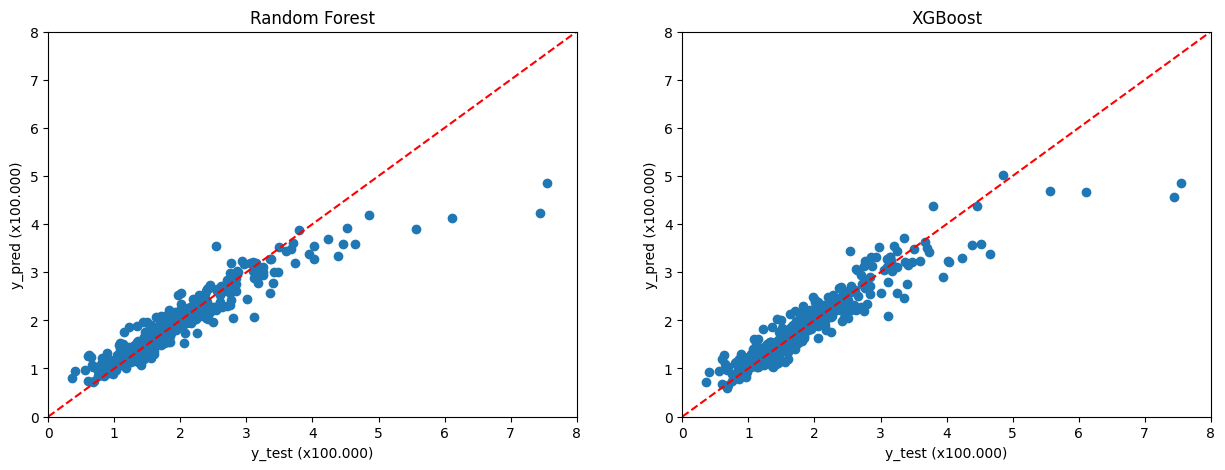

In [105]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rf/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

## Fazendo a previsão para a base de teste da competição

In [106]:
# Mantendo apenas as colunas numéricas
col_nr_test = teste.columns[teste.dtypes != 'object']
teste = teste.loc[:,col_nr_test]

## Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle

### Utilizando Random Forest
- Melhor resultado

In [107]:
y_pred = reg_rf_best.predict(teste)

#### Podemos adicionar essa coluna de previsão na nossa base


In [108]:
teste['SalePrice'] = y_pred

### E extrair somente o Id e o SalePrice como pede o Kaggle


In [109]:
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,119298.550
1,1462,157027.500
2,1463,178858.975


### Podemos então exportar essa base


In [110]:
base_kaggle.to_csv('resultado5.csv',index=False)

### Fazendo tambem a previsão com o XGBoost

In [111]:
# Retirando a coluna SalePrice
teste = teste.drop('SalePrice',axis=1)

In [112]:
# Usando o XGBoost para fazer a regressão
y_pred = reg_xgb_best.predict(teste)

In [113]:
# Podemos novamente adicionar a coluna na base
teste['SalePrice'] = y_pred

In [114]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,135623.796875
1,1462,154920.687500
2,1463,190454.078125


In [115]:
# E exportar a nova base
base_kaggle.to_csv('resultado5xgb.csv',index=False)